In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

## 1. Training Progress

In [2]:
import os
import platform
if platform.system() == 'Darwin':
    DATA_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Data.nosync"
    ROOT_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Thesis"
elif platform.system() == 'Linux':
    DATA_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync"
    ROOT_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Thesis"

current_wd = os.getcwd()

In [3]:
def read_timestamp_file(path):
    with open(path, 'rb') as f:
        lines = f.readlines()
    data = []
    for i in range(0, len(lines), 2):
        if b'**Best**' in lines[i]:
            continue
        step_number = int(lines[i].decode().split('-')[1].strip().strip(','))
        values = ast.literal_eval(lines[i+1].decode().strip())
        values['Step'] = step_number
        data.append(values)

    df = pd.DataFrame(data)
    df.set_index('Step', inplace=True)
    df = df[df.columns.drop(list(df.filter(regex='delta')))]
    return df

### 1.1. 00003_snapshot_920

In [4]:
model_out_dir = f"{DATA_PATH}/Models/e4e/00003_snapshot_920"
log_path = f"{model_out_dir}/checkpoints/timestamp.txt"
log_00003 = read_timestamp_file(log_path)
min_loss = log_00003.iloc[log_00003.loss.argmin()]
print(f"Minimum Loss: {min_loss.loss} at step {min_loss.name}")

Minimum Loss: 0.2743405754919405 at step 38000


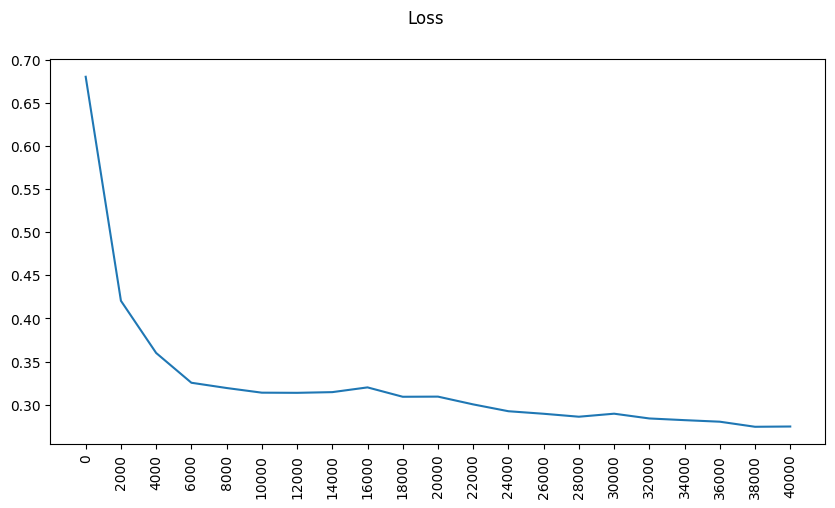

In [5]:
fig, ax = plt.subplots(figsize = (10,5))
plt.xticks(log_00003.index)
ax.set_xticklabels(log_00003.index, rotation=90)
plt.plot(log_00003.loss)
fig.suptitle('Loss')
plt.show()

### 1.2. 00005_snapshot_1200

In [6]:
model_out_dir = f"{DATA_PATH}/Models/e4e/00005_snapshot_1200"
log_path = f"{model_out_dir}/checkpoints/timestamp.txt"
log_path_resume = f"{model_out_dir}/setup/checkpoints/timestamp.txt"

In [7]:
first_training = read_timestamp_file(log_path)
resume = read_timestamp_file(log_path_resume)

df = pd.concat([first_training, resume])

min_loss = df.iloc[df.loss.argmin()]
print(f"Minimum Loss: {min_loss.loss} at step {min_loss.name}")

Minimum Loss: 0.21591595715267367 at step 156000


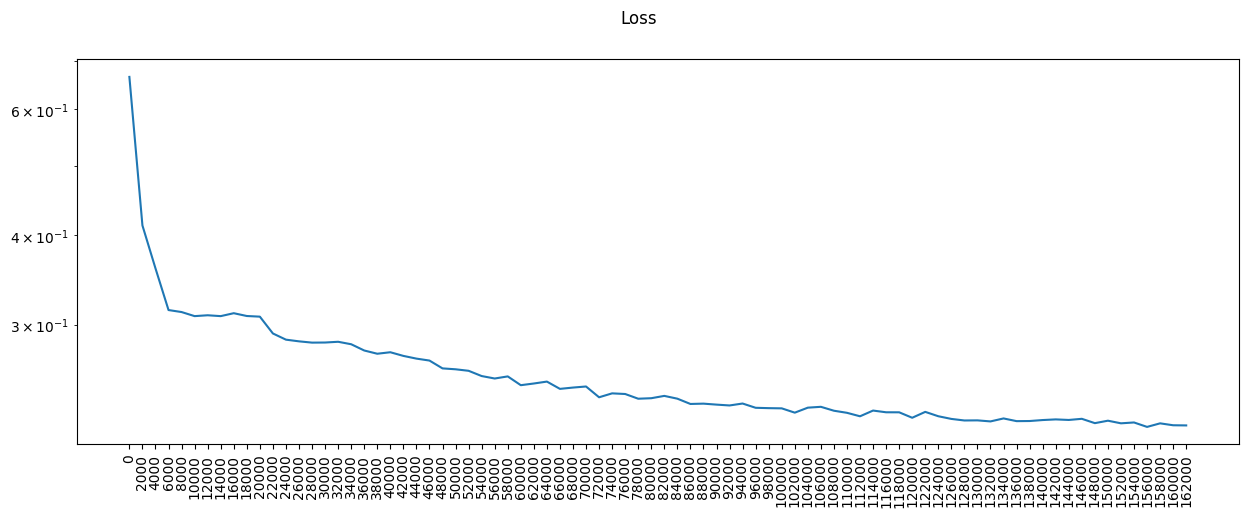

In [8]:
fig, ax = plt.subplots(figsize = (15,5))
plt.xticks(df.index)
ax.set_xticklabels(df.index, rotation=90)
plt.yscale('log')
plt.plot(df.loss)
fig.suptitle('Loss')
plt.show()

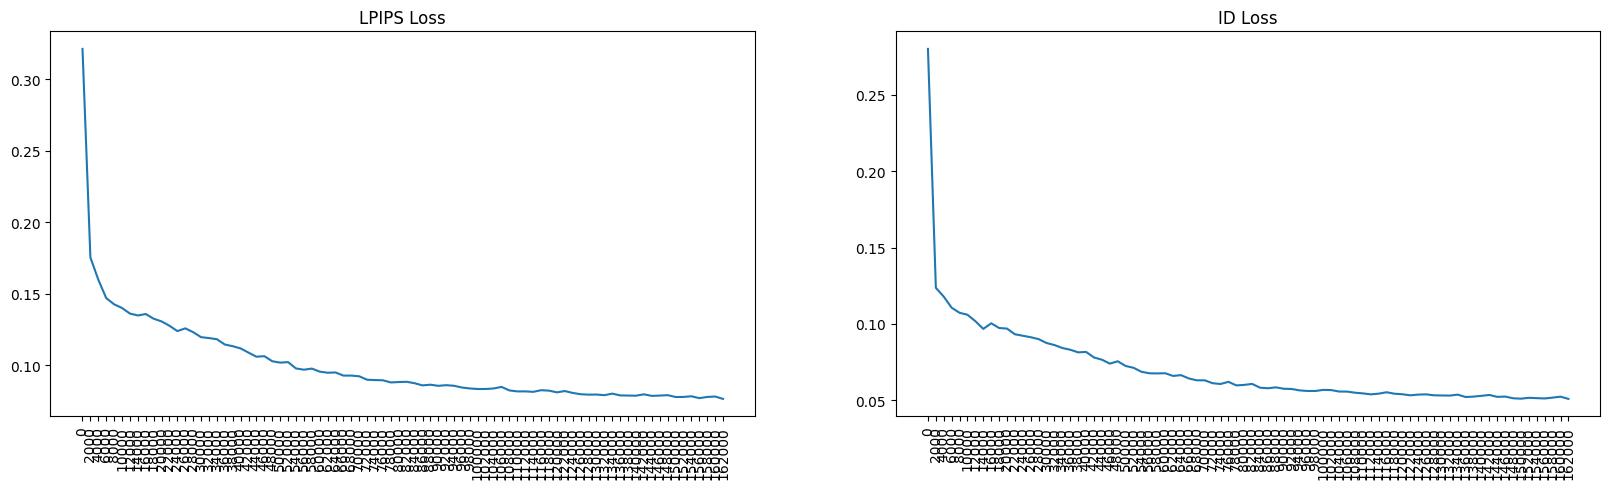

In [9]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(df.loss_lpips)
ax[0].set_title('LPIPS Loss')
ax[0].set_xticks(df.index)
ax[0].set_xticklabels(df.index, rotation=90)

ax[1].plot(df.loss_id)
ax[1].set_title('ID Loss')
ax[1].set_xticks(df.index)
ax[1].set_xticklabels(df.index, rotation=90)
plt.show()